In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data_a = pd.read_csv(r'D:\Python Work\GetFreeCourses.Co-Udemy-Complete Machine Learning & Data Science Bootcamp 2023\11 - Milestone Project 1 Supervised Learning Classification\157 - heart-disease.csv')

In [5]:
data_a.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data_a.shape

(303, 14)

In [7]:
data_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data_a.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
data_a.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [10]:
data_a['age'].corr(data_a['target'])

-0.22543871587483727

In [11]:
data_a.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [12]:
data_a['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [13]:
data_a['target'].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

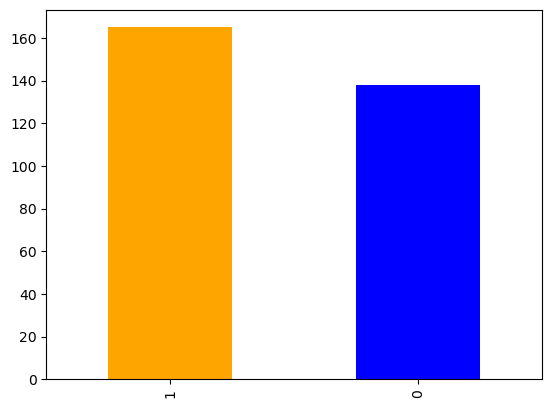

In [16]:
data_a['target'].value_counts().plot(kind='bar', color=['orange', 'blue']);

In [17]:
data_a['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

<Axes: >

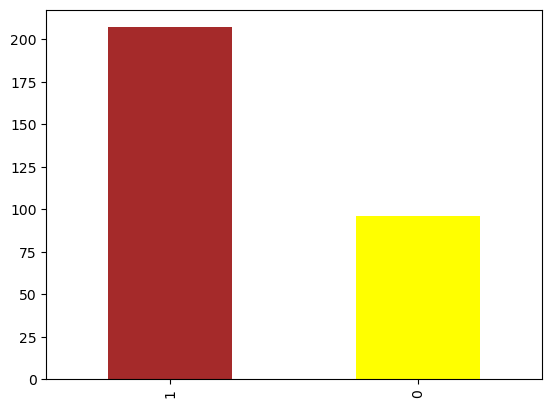

In [18]:
data_a['sex'].value_counts().plot(kind='bar', color=['brown', 'yellow'])

In [22]:
pd.crosstab(data_a.sex, data_a.target)

target,0,1
sex,,
0,24,72
1,114,93


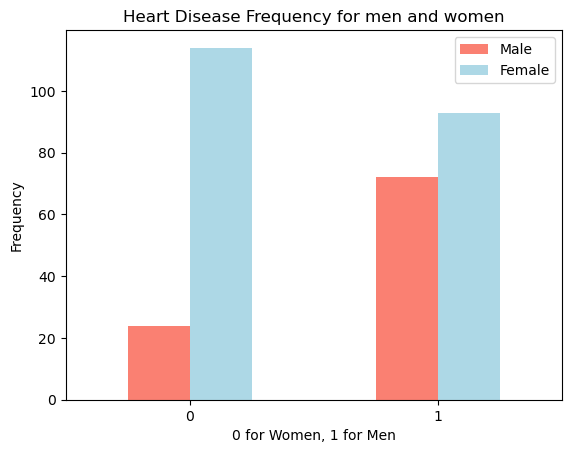

In [29]:
pd.crosstab(data_a.target, data_a.sex).plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency for men and women')
plt.xlabel('0 for Women, 1 for Men')
plt.ylabel('Frequency')
plt.legend(['Male', 'Female'])
plt.xticks(rotation=0);

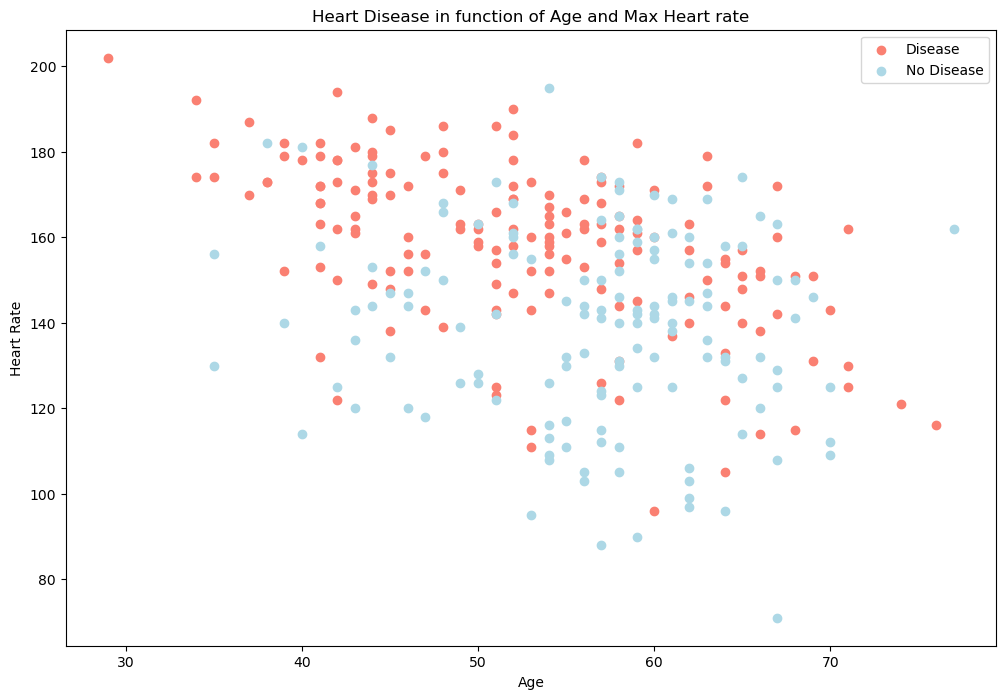

In [36]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(data_a.age[data_a.target==1],
           data_a.thalach[data_a.target==1],
           color=['salmon'])
plt.scatter(data_a.age[data_a.target==0],
           data_a.thalach[data_a.target==0],
           color=['lightblue'])
plt.title('Heart Disease in function of Age and Max Heart rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.legend(['Disease', 'No Disease']);

<Axes: ylabel='Frequency'>

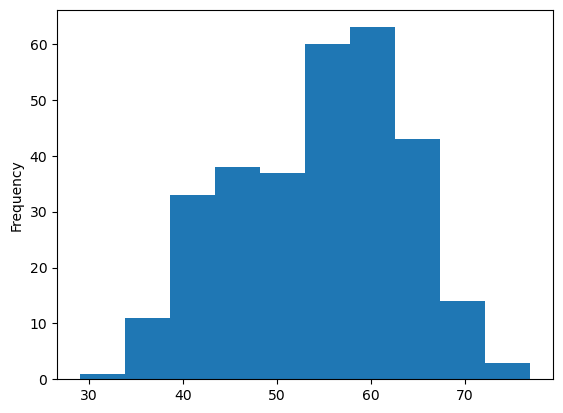

In [37]:
data_a.age.plot(kind='hist')

In [38]:
pd.crosstab(data_a.cp, data_a.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


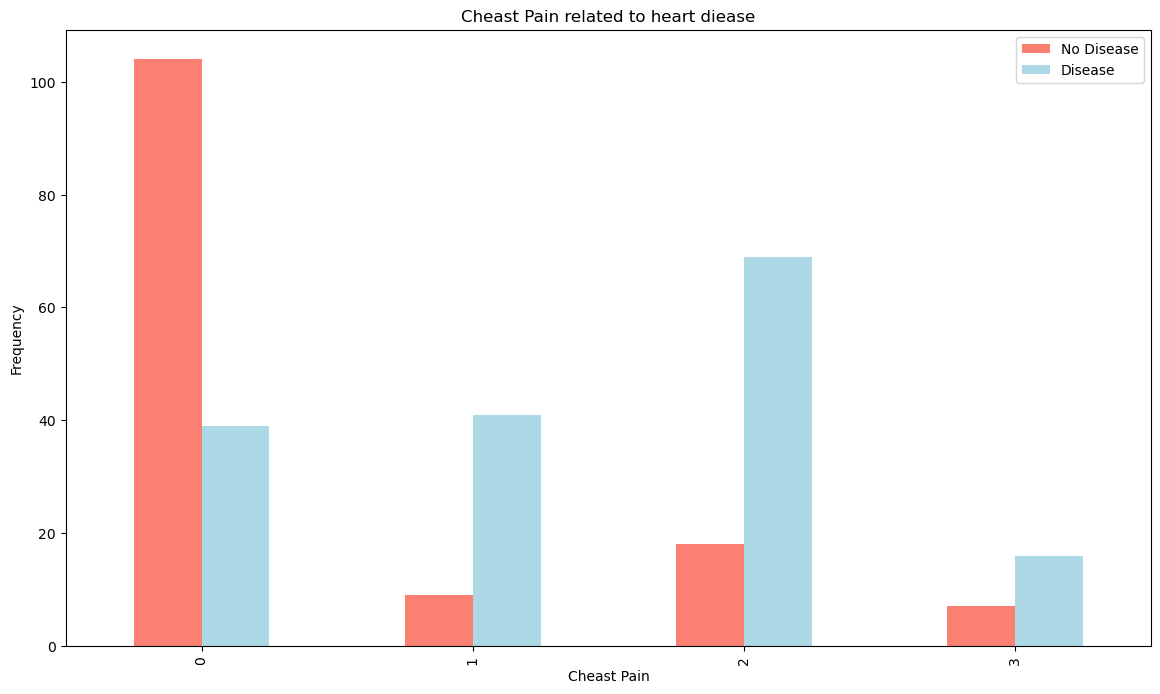

In [42]:
pd.crosstab(data_a.cp, data_a.target).plot(kind='bar', figsize=(14, 8), color=['salmon', 'lightblue'])
plt.title('Cheast Pain related to heart diease')
plt.xlabel('Cheast Pain')
plt.ylabel('Frequency')
plt.legend(['No Disease', 'Disease'] );

In [44]:
corr_matrix = data_a.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


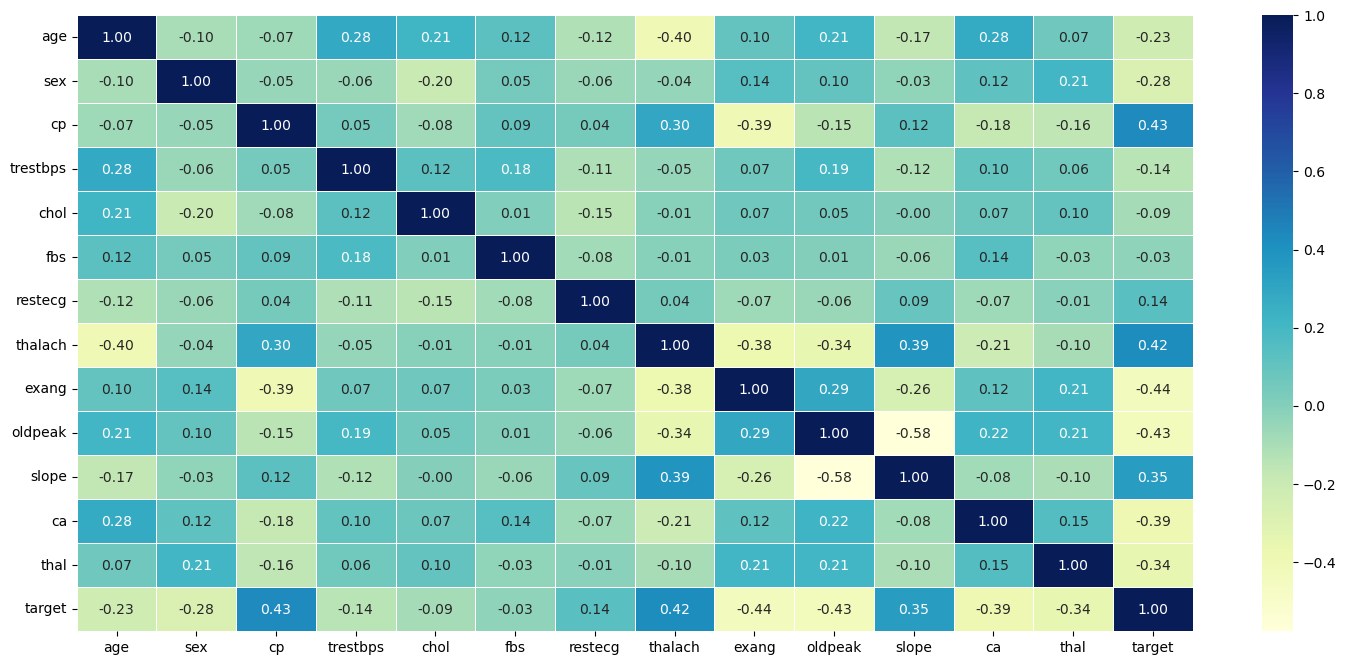

In [54]:
import seaborn as sns
plt.figure(figsize=(18, 8))
sns.heatmap(corr_matrix, 
           annot=True,
           linewidths=0.5,
           fmt='.2f',
           cmap='YlGnBu');

Now lets ready our data for model creation

In [55]:
X= data_a.drop('target', axis=1)
y= data_a['target']

In [56]:
X.shape, y.shape

((303, 13), (303,))

# lets split our data for training and testing

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [64]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=42, n_jobs=-1)
logistic.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=42)

In [65]:
logistic.score(X_train, y_train)

0.8553719008264463

In [70]:
y_preds= logistic.predict(X_test)

In [80]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
def show_scores(model):
    y_preds = model.predict(X_test)
    scores = {"Classficication Report" : classification_report(y_test, y_preds),
             "Accuracy_score": accuracy_score(y_test, y_preds),
             "Confusion Matrix": confusion_matrix(y_test, y_preds)}
    return scores

In [81]:
show_scores(logistic)

{'Classficication Report': '              precision    recall  f1-score   support\n\n           0       0.89      0.86      0.88        29\n           1       0.88      0.91      0.89        32\n\n    accuracy                           0.89        61\n   macro avg       0.89      0.88      0.88        61\nweighted avg       0.89      0.89      0.89        61\n',
 'Accuracy_score': 0.8852459016393442,
 'Confusion Matrix': array([[25,  4],
        [ 3, 29]], dtype=int64)}

In [83]:
from sklearn.svm import LinearSVC
model2 = LinearSVC()
model2.fit(X_train, y_train)

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [84]:
show_scores(model2)

{'Classficication Report': '              precision    recall  f1-score   support\n\n           0       0.69      0.93      0.79        29\n           1       0.91      0.62      0.74        32\n\n    accuracy                           0.77        61\n   macro avg       0.80      0.78      0.77        61\nweighted avg       0.81      0.77      0.77        61\n',
 'Accuracy_score': 0.7704918032786885,
 'Confusion Matrix': array([[27,  2],
        [12, 20]], dtype=int64)}

In [89]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)

RandomForestClassifier()

In [90]:
show_scores(model3)

{'Classficication Report': '              precision    recall  f1-score   support\n\n           0       0.86      0.83      0.84        29\n           1       0.85      0.88      0.86        32\n\n    accuracy                           0.85        61\n   macro avg       0.85      0.85      0.85        61\nweighted avg       0.85      0.85      0.85        61\n',
 'Accuracy_score': 0.8524590163934426,
 'Confusion Matrix': array([[24,  5],
        [ 4, 28]], dtype=int64)}

In [92]:
print(model3.get_params)

<bound method BaseEstimator.get_params of RandomForestClassifier()>


In [100]:
%%time
from sklearn.model_selection import GridSearchCV
test_model = RandomForestClassifier()
param_grid = {"n_estimators" : np.arange(10, 110, 10),
             "max_features" : ['auto', 'sqrt', 'log2'],
             "max_depth": np.arange(1, 12, 2),
             "criterion":['gini', 'entropy']}
CV_grip = GridSearchCV(test_model, param_grid, cv=5)
CV_grip.fit(X_train, y_train)

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

CPU times: total: 2min 41s
Wall time: 2min 47s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  3,  5,  7,  9, 11]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])})

In [101]:
CV_grip.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 30}

In [102]:
ideal_model = RandomForestClassifier(n_estimators=30,
                                     n_jobs=-1,
                                     random_state=42,
                                    max_depth=7,
                                    max_features='log2',
                                    criterion='gini')
ideal_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=30,
                       n_jobs=-1, random_state=42)

In [103]:
show_scores(ideal_model)

{'Classficication Report': '              precision    recall  f1-score   support\n\n           0       0.83      0.86      0.85        29\n           1       0.87      0.84      0.86        32\n\n    accuracy                           0.85        61\n   macro avg       0.85      0.85      0.85        61\nweighted avg       0.85      0.85      0.85        61\n',
 'Accuracy_score': 0.8524590163934426,
 'Confusion Matrix': array([[25,  4],
        [ 5, 27]], dtype=int64)}

# lets try hypertuning using GridsearchCV on Logistic Regression

In [106]:
grid = {"C": np.logspace(-3, 3, 7), "penalty":['l1', 'l2']}

In [108]:
tesT_model = LogisticRegression()
grid_cv = GridSearchCV(tesT_model, grid, cv=10)
grid_cv.fit(X_train, y_train)

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [109]:
grid_cv.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [110]:
ideal_model2 = LogisticRegression(C=0.1, penalty='l2')
ideal_model2.fit(X_train, y_train)

C:\Users\Waqas Nasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [111]:
show_scores(ideal_model2)

{'Classficication Report': '              precision    recall  f1-score   support\n\n           0       0.89      0.86      0.88        29\n           1       0.88      0.91      0.89        32\n\n    accuracy                           0.89        61\n   macro avg       0.89      0.88      0.88        61\nweighted avg       0.89      0.89      0.89        61\n',
 'Accuracy_score': 0.8852459016393442,
 'Confusion Matrix': array([[25,  4],
        [ 3, 29]], dtype=int64)}

# After compairing all above models' scores it is clear that logistic regression is the best model

* Lets analyze all evaluation metrics briefly

# 1 Accuracy Score

In [113]:
y_preds = ideal_model2.predict(X_test)

In [114]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [115]:
accuracy_score(y_test, y_preds)

0.8852459016393442

# 2 Confusion Matrix

In [117]:
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

25 are True Positive, 
4 are False Negatives,
3 are False Positives,
and, 29 are True Negatives

# 3 Classfication Report

In [120]:
classification_report(y_test, y_preds)

'              precision    recall  f1-score   support\n\n           0       0.89      0.86      0.88        29\n           1       0.88      0.91      0.89        32\n\n    accuracy                           0.89        61\n   macro avg       0.89      0.88      0.88        61\nweighted avg       0.89      0.89      0.89        61\n'

precision is accuracy of positive presictions i.e. true positive/true positive + flase positives,
recall is what precent of the positive cases did you catch: fraction of positives that were correctly identified
    true positives/ true positives + false negatives
f1 score is what precent of positive prediction were correct i.e. it is the harmonic mean
    formula is 2*(recall* precision)/(recall+precision)


In [123]:
predict_proba_ideal2 = ideal_model2.predict_proba(X_test)

In [124]:
predict_proba_ideal2

array([[0.83641537, 0.16358463],
       [0.25052951, 0.74947049],
       [0.2044559 , 0.7955441 ],
       [0.91878635, 0.08121365],
       [0.16154145, 0.83845855],
       [0.16001565, 0.83998435],
       [0.38675279, 0.61324721],
       [0.99198774, 0.00801226],
       [0.97518518, 0.02481482],
       [0.40311787, 0.59688213],
       [0.31277255, 0.68722745],
       [0.84886376, 0.15113624],
       [0.13322627, 0.86677373],
       [0.90177078, 0.09822922],
       [0.04910266, 0.95089734],
       [0.07969376, 0.92030624],
       [0.05097404, 0.94902596],
       [0.87737957, 0.12262043],
       [0.96855473, 0.03144527],
       [0.95780361, 0.04219639],
       [0.29275563, 0.70724437],
       [0.95268047, 0.04731953],
       [0.85188542, 0.14811458],
       [0.34896581, 0.65103419],
       [0.14978968, 0.85021032],
       [0.29725398, 0.70274602],
       [0.19549741, 0.80450259],
       [0.28177572, 0.71822428],
       [0.96918607, 0.03081393],
       [0.15006993, 0.84993007],
       [0.

In [126]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, predict_proba_ideal2[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [127]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, predict_proba_ideal2[:, 1])
print(auc_score)

0.9299568965517242


C:\Users\Waqas Nasir\AppData\Local\Temp\ipykernel_2252\912961974.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


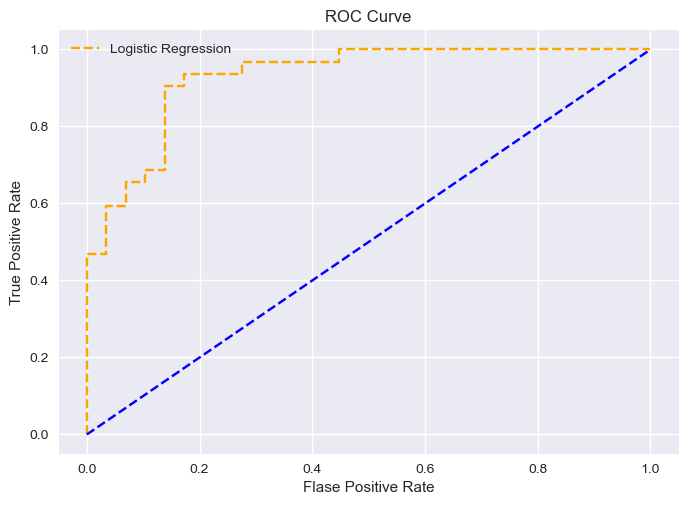

In [131]:
plt.style.use('seaborn')

plt.plot(fpr, tpr, linestyle='--', color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC Curve')
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show();

In [133]:
from joblib import dump
dump(ideal_model2, r"C:\Users\Waqas Nasir\Desktop\106 - scikit-learn-data\heart_diease_logistic_regression_model.joblib")

['C:\\Users\\Waqas Nasir\\Desktop\\106 - scikit-learn-data\\heart_diease_logistic_regression_model.joblib']

In [135]:
ideal_model2.coef_

array([[-5.01760672e-04, -6.28028496e-01,  5.76916408e-01,
        -1.15449247e-02, -1.50939683e-03,  2.73122271e-02,
         2.06983272e-01,  2.38722273e-02, -4.57488584e-01,
        -5.19569304e-01,  3.43828619e-01, -5.48959446e-01,
        -5.44709905e-01]])

In [137]:
features_dict = dict(zip(data_a.columns, list(ideal_model2.coef_[0])))

In [138]:
features_dict

{'age': -0.0005017606716598225,
 'sex': -0.6280284960728267,
 'cp': 0.5769164078891779,
 'trestbps': -0.011544924695654614,
 'chol': -0.0015093968259028195,
 'fbs': 0.02731222708931969,
 'restecg': 0.20698327181029805,
 'thalach': 0.02387222728973848,
 'exang': -0.4574885843037101,
 'oldpeak': -0.5195693037287992,
 'slope': 0.343828619091371,
 'ca': -0.5489594458877478,
 'thal': -0.5447099052282647}

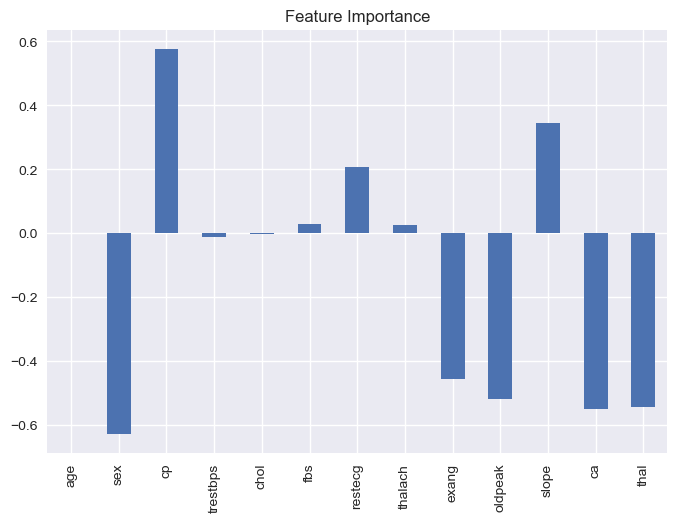

In [140]:
feature_df = pd.DataFrame(features_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);

# lets check different feature importance

In [141]:
pd.crosstab(data_a.sex, data_a.target)

target,0,1
sex,,
0,24,72
1,114,93


In [142]:
pd.crosstab(data_a.cp, data_a.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [143]:
pd.crosstab(data_a.slope, data_a.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
